# Machine Learning Model building for Letter Recognition dataset using multiclass classification


<img src="https://github.com/pathakchiranjit/Machine-Learning/blob/main/Classification/Letter_Recognition/Pics/l10.gif?raw=true" />


<img src="https://github.com/pathakchiranjit/Machine-Learning/blob/main/Classification/Letter_Recognition/Pics/l11.gif?raw=true" />

Letter recognition using machine learning algorithm is practised as a case study across the globe.

<img src="https://github.com/pathakchiranjit/Machine-Learning/blob/main/Classification/Letter_Recognition/Pics/l4.jpg?raw=true"/>

---

## Table of Contents

1. [Problem Statement](#section1)<br>

2. [Data Loading and Description](#section2)<br>

3. [Preprocessing](#section3)<br>
    - 3.1 [Importing packages](#section301)<br>
    - 3.2 [Exploratory Data Analysis](#section302)<br>
    - 3.3 [Feature Selection](#section303)<br>

4. [Train-Test Split](#section4)<br>
  
5. [OneVsRest Classifier : SVC - RBF](#section5)<br>
    - 5.1 [Build Model](#section501)<br>
    - 5.2 [Model Evaluation](#section502)<br>
	
6. [OneVsRest Classifier : RandomForest](#section6)<br>
    - 6.1 [Build Model](#section601)<br>
    - 6.2 [Model Evaluation](#section602)<br>
	
7. [OneVsRest Classifier : LogisticRegression](#section7)<br>
    - 7.1 [Build Model](#section701)<br> 
    - 7.2 [Model Evaluation](#section702)<br>
	
8. [OneVsRest Classifier : Naive Bayes](#section8)<br>
    - 8.1 [Build Model](#section801)<br> 
    - 8.2 [Model Evaluation](#section802)<br>

9. [OneVsRest Classifier : SVC - Linear](#section9)<br>
    - 9.1 [Build Model](#section901)<br>
    - 9.2 [Model Evaluation](#section902)<br>

10. [Model Evaluation among all the employed model](#section10)<br>
    - 10.1 [Precision-Recall Curve among models](#section1001)<br>
    - 10.2 [Confusion Matrix and Classification Report](#section1002)<br>
	
11. [Cross Validation and Prediction with selected model](#section11)<br>

12. [Conclusion](#section12)<br>

### 1. Problem Statement

The objective is to __identify__ each of a large number of __black-and-white__ rectangular __pixel displays__ as one of the __26 capital letters__ in the English alphabet

<img src="https://github.com/pathakchiranjit/Machine-Learning/blob/main/Classification/Letter_Recognition/Pics/l1.jpg?raw=true" />

### 2. Data Loading and Description

Source of the data:

https://archive.ics.uci.edu/ml/datasets/letter+recognition


- The character images were based on __20 different fonts__ and each letter within these 20 fonts was randomly distorted to produce a file of __20,000 unique stimuli__. Each stimulus was converted into __16 primitive numerical attributes (statistical moments and edge counts)__ which were then scaled to fit into a range of integer values from 0 through 15. 
- We typically train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000. 
- Below is a table showing names of all the columns and their description.

<img src="https://github.com/pathakchiranjit/Machine-Learning/blob/main/Classification/Letter_Recognition/Pics/l2.jpg?raw=true"/>

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| letter          | capital letter (26 values from A to Z) interval                                    | 
| x-box   | horizontal position of box(integer)                                               |  
| y-box      | vertical position of box (integer)                                   | 
|width      | width of box (integer)        |   
| high      | height of box (integer)                                          |
| onpix            | total # on pixels (integer)   |
| x-bar         | mean x of on pixels in box (integer) |
| y-bar         | mean y of on pixels in box (integer)|
| x2bar      | mean x variance (integer)                                          |
| y2bar            | mean y variance (integer)   |
| xybar         | mean x y correlation (integer) |
| x2ybar         | mean of x * x * y (integer)|
| xy2bar       | mean of x * y * y (integer)                                       |
| xedge            | mean edge count left to right (integer)   |
| xedgey         | correlation of xedge with y (integer) |
| yedge            | mean edge count bottom to top (integer)   |
| yedgex         | correlation of yedge with x (integer) |


<img src="https://github.com/pathakchiranjit/Machine-Learning/blob/main/Classification/Letter_Recognition/Pics/l9.jpg?raw=true"/>

### 3. Preprocessing

#### 3.1 Importing packages                                          

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                                       
%matplotlib inline
sns.set()
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


"\nimport warnings\nwarnings.filterwarnings('ignore')\n\nfrom subprocess import check_output\n"

In [ ]:
file1="https://raw.githubusercontent.com/pathakchiranjit/Machine-Learning/main/Classification/Letter_Recognition/Dataset/letter_recognition.csv"
df1 = pd.read_csv(file1)  # (encoding='ISO-8859-1',sep="|") not required here
df1.head(3)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9


In [ ]:
before_shape = df1.shape
print('Data Shape [Before]:', before_shape)

df1.drop_duplicates(inplace = True)

after_shape = df1.shape
print('Data Shape [After]:', after_shape)

drop_nums = before_shape[0] - after_shape[0]
drop_percent = np.round(drop_nums / before_shape[0], decimals = 5) * 100

print('Drop Ratio:', drop_percent, '%')

Data Shape [Before]: (20000, 17)
Data Shape [After]: (18668, 17)
Drop Ratio: 6.660000000000001 %


In [ ]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df1)

,Total,Percent
yedgex,0,0.0
ybar,0,0.0
xbox,0,0.0
ybox,0,0.0
width,0,0.0
height,0,0.0
onpix,0,0.0
xbar,0,0.0
x2bar,0,0.0
yedge,0,0.0


#### 3.2 Exploratory Data Analysis                                          

Text(0.5, 1.0, 'Letter counts')

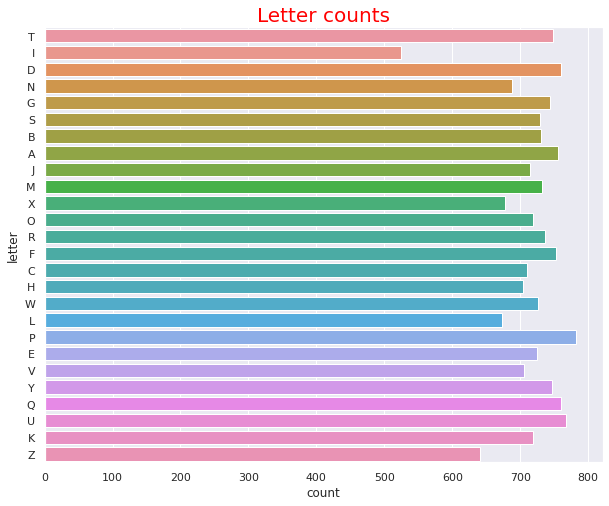

In [ ]:
plt.figure(figsize=(10,8))
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.countplot(y='letter', data=df1)
plt.title('Letter counts',fontsize=20, color='red')

Remarks: Class balance presents in dataset.

In [ ]:
order = list(np.sort(df1['letter'].unique()))
print(order)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [ ]:
ltr=sorted(df1['letter'].unique())
ltr[0]
len(ltr)

26

In [ ]:
clm = df1.columns
#clm[2]
len(clm)
clm

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

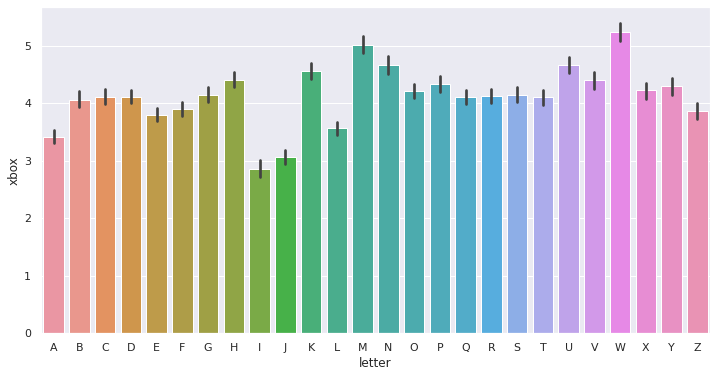

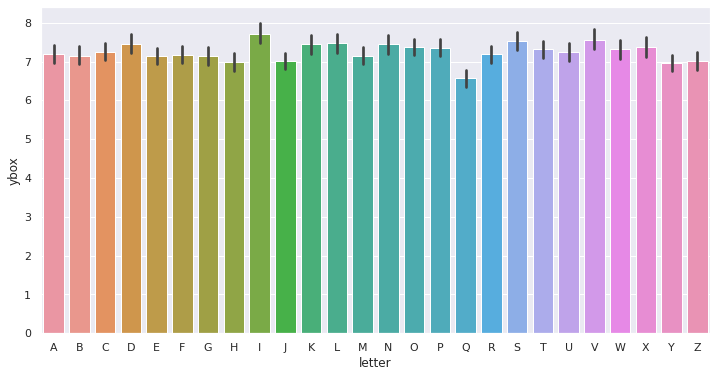

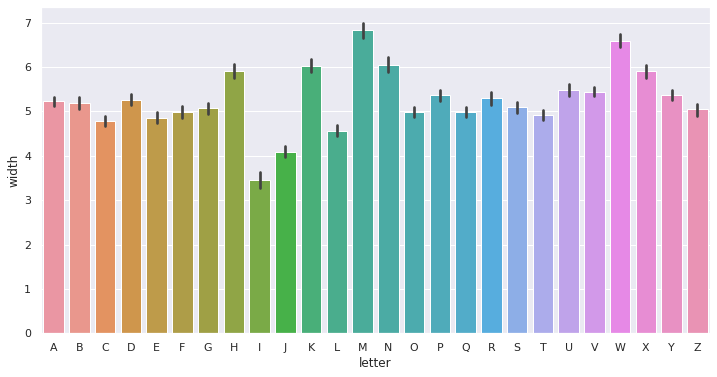

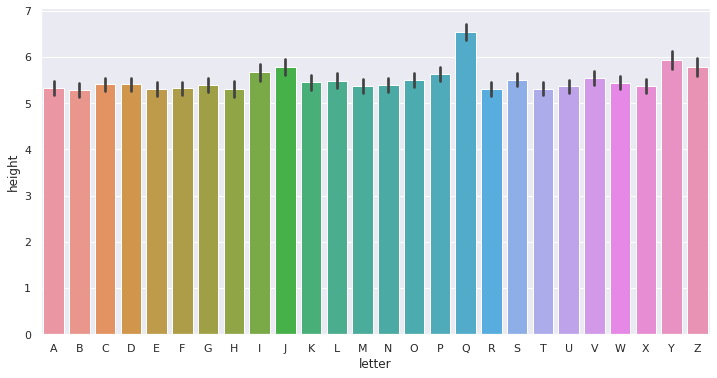

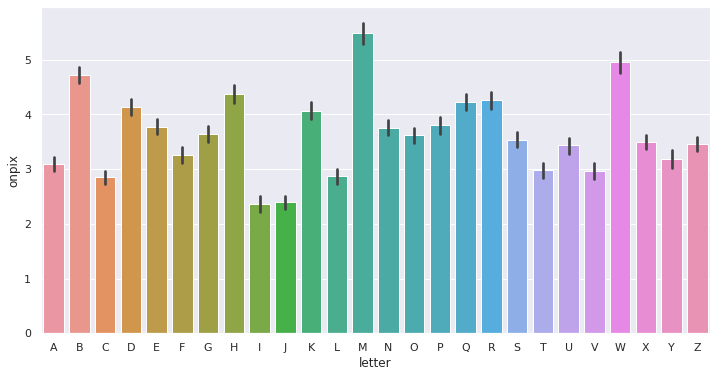

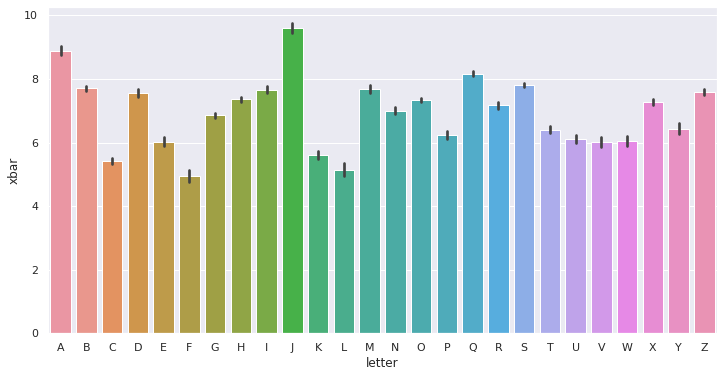

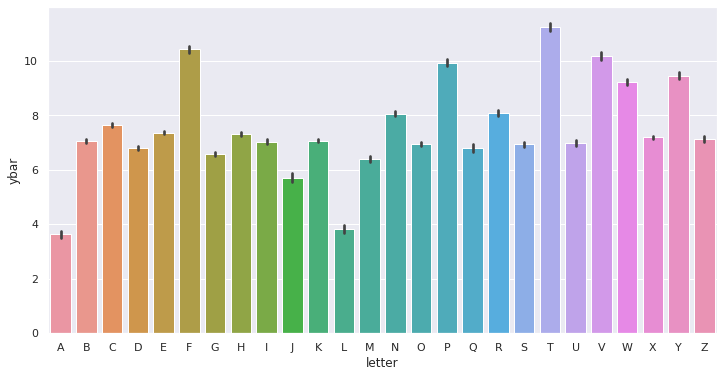

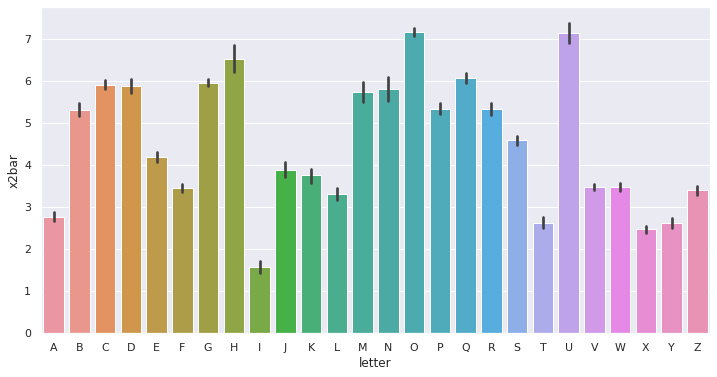

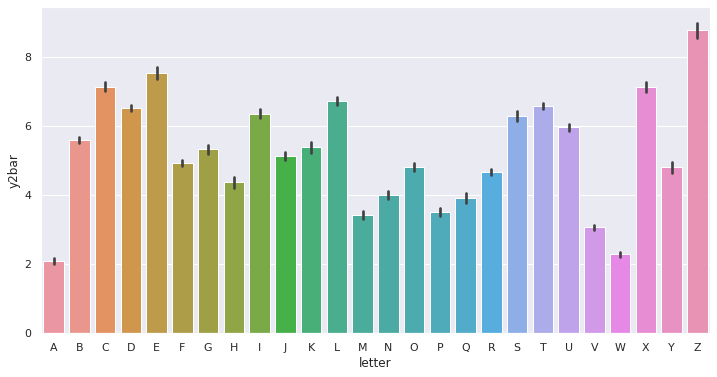

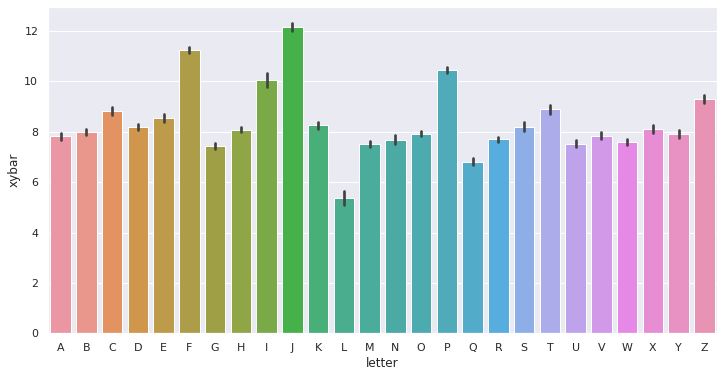

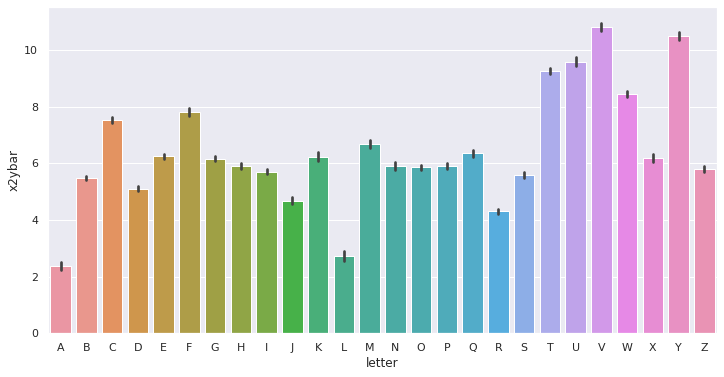

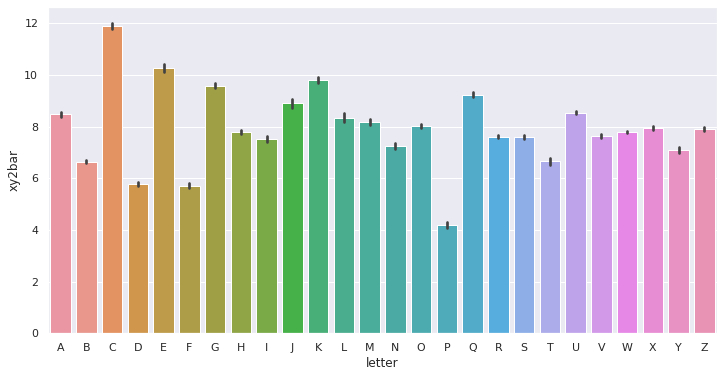

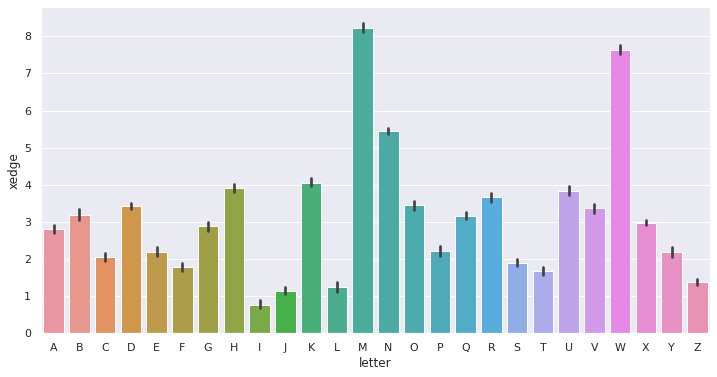

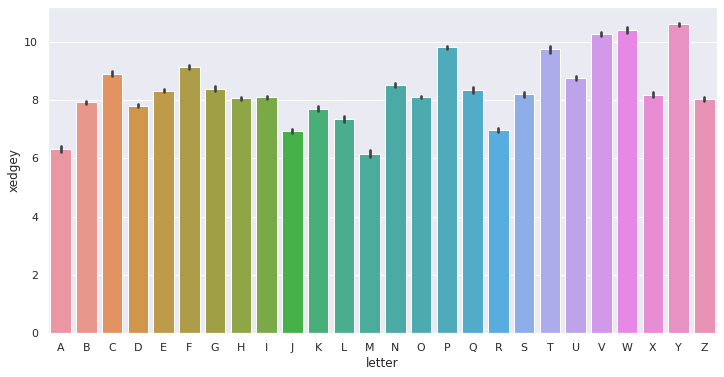

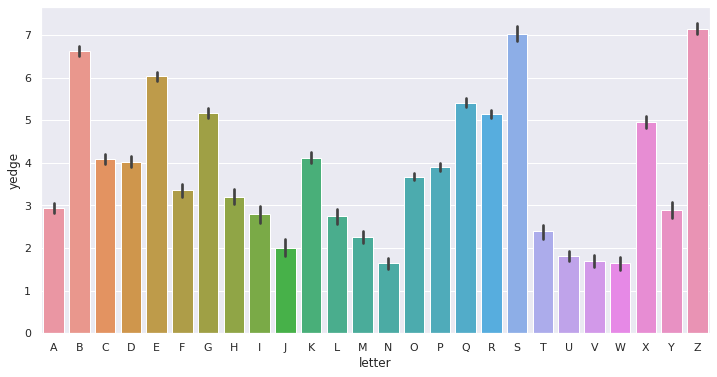

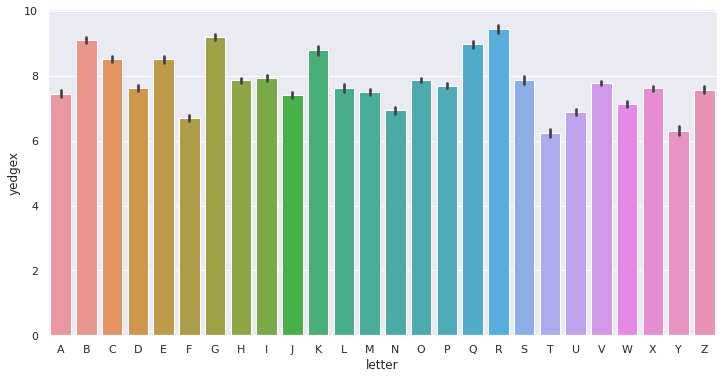

In [ ]:
for i in range(1,len(clm),1):
  plt.figure(figsize=(12, 6))
  sns.barplot(x='letter', y=clm[i], data=df1, order=order)

Remarks: Measuring parameters are well distributed for each target classes.

In [ ]:
df1_mean = df1.groupby('letter').mean()
df1_mean.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,,,,,,,,,,,,,,,,
A,3.416667,7.190476,5.230159,5.326720,3.089947,8.892857,3.642857,2.780423,2.101852,7.814815,2.359788,8.474868,2.806878,6.317460,2.935185,7.451058
B,4.065753,7.145205,5.191781,5.294521,4.716438,7.702740,7.061644,5.326027,5.593151,7.997260,5.490411,6.649315,3.191781,7.912329,6.620548,9.093151
C,4.112676,7.250704,4.780282,5.414085,2.852113,5.418310,7.639437,5.919718,7.138028,8.818310,7.526761,11.890141,2.050704,8.897183,4.088732,8.518310
D,4.117105,7.453947,5.267105,5.415789,4.135526,7.557895,6.811842,5.896053,6.513158,8.186842,5.102632,5.763158,3.435526,7.802632,4.028947,7.623684
E,3.805517,7.139310,4.856552,5.306207,3.779310,6.017931,7.364138,4.190345,7.540690,8.553103,6.248276,10.274483,2.201379,8.313103,6.034483,8.504828


In [ ]:
df1_mean.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,4.134973,7.250761,5.260680,5.507995,3.642123,6.926340,7.506785,4.536758,5.243178,8.363976,6.429211,7.938997,3.100833,8.341131,3.796280,7.786715
std,0.523581,0.237131,0.702601,0.270625,0.750099,1.121684,1.784813,1.568789,1.650967,1.383661,2.042454,1.542163,1.784691,1.152771,1.697310,0.854408
min,2.860687,6.567105,3.448473,5.294521,2.370229,4.953457,3.642857,1.580153,2.101852,5.364042,2.359788,4.196931,0.772901,6.155738,1.638081,6.235294
25%,3.943633,7.146926,4.986398,5.336511,3.113707,6.074213,6.843107,3.416863,4.093395,7.691677,5.623506,7.316725,1.941688,7.830056,2.477142,7.413814
50%,4.135088,7.251003,5.210970,5.414937,3.574603,7.089164,7.105403,4.392155,5.227862,8.041244,6.042592,7.861075,2.927442,8.188736,3.515935,7.661586
75%,4.384500,7.428273,5.472518,5.533379,4.116965,7.640804,8.091003,5.874801,6.475040,8.752008,7.316860,8.523990,3.608725,8.863968,5.105126,8.360968
max,5.247934,7.717557,6.825137,6.546053,5.480874,9.594406,11.256684,7.167131,8.779687,12.163636,10.820113,11.890141,8.225410,10.593834,7.142188,9.453189


In [ ]:
df1

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,T,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4


In [ ]:
# Normalizing the columns of df1_mean dataframe.
# x_norm = (x - x_min) / (x_max - x_min)

for colname in df1_mean.columns:
    df1_mean[colname] = (df1_mean[colname] - df1_mean[colname].min()) / (df1_mean[colname].max() - df1_mean[colname].min())

df1_mean.head(3)

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,,,,,,,,,,,,,,,,
A,0.232896,0.541849,0.527647,0.025728,0.231373,0.848835,0.000000,0.214834,0.000000,0.360429,0.000000,0.556067,0.272925,0.036440,0.235661,0.377814
B,0.504793,0.502498,0.516281,0.000000,0.754252,0.592397,0.449023,0.670465,0.522819,0.387261,0.370036,0.318773,0.324573,0.395798,0.905227,0.888114
C,0.524449,0.594200,0.394416,0.095534,0.154914,0.100163,0.524911,0.776729,0.754163,0.508011,0.610730,1.000000,0.171459,0.617708,0.445241,0.709475


In [ ]:
df1_mean.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.533789,0.594250,0.536686,0.170571,0.408884,0.425103,0.507488,0.529196,0.470411,0.441193,0.481001,0.486412,0.312369,0.492417,0.392107,0.482123
std,0.219324,0.206120,0.208075,0.216235,0.241139,0.241693,0.234417,0.280794,0.247231,0.203492,0.241416,0.200458,0.239475,0.259744,0.308372,0.265518
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.453638,0.503994,0.455457,0.033551,0.239011,0.241493,0.420321,0.328748,0.298232,0.342320,0.385767,0.405526,0.156831,0.377260,0.152443,0.366239
50%,0.533837,0.594460,0.521964,0.096215,0.387178,0.460187,0.454771,0.503314,0.468117,0.393730,0.435303,0.476283,0.289103,0.458079,0.341173,0.443238
75%,0.638314,0.748547,0.599422,0.190853,0.561535,0.579051,0.584219,0.768689,0.654881,0.498260,0.585920,0.562452,0.380519,0.610223,0.629901,0.660579
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
def tmtype(row):
    if row['width']> 0.62:
        val = 'Big'
    else:
        val = 'Small'
    return val

In [ ]:
df1_mean['Type'] = df1_mean.apply(tmtype, axis=1)
df1_mean.head(3)

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,Type
letter,,,,,,,,,,,,,,,,,
A,0.232896,0.541849,0.527647,0.025728,0.231373,0.848835,0.000000,0.214834,0.000000,0.360429,0.000000,0.556067,0.272925,0.036440,0.235661,0.377814,Small
B,0.504793,0.502498,0.516281,0.000000,0.754252,0.592397,0.449023,0.670465,0.522819,0.387261,0.370036,0.318773,0.324573,0.395798,0.905227,0.888114,Small
C,0.524449,0.594200,0.394416,0.095534,0.154914,0.100163,0.524911,0.776729,0.754163,0.508011,0.610730,1.000000,0.171459,0.617708,0.445241,0.709475,Small


In [ ]:
df1_mean['index'] = df1_mean.index
df1_mean.head(3) 

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,Type,index
letter,,,,,,,,,,,,,,,,,,
A,0.232896,0.541849,0.527647,0.025728,0.231373,0.848835,0.000000,0.214834,0.000000,0.360429,0.000000,0.556067,0.272925,0.036440,0.235661,0.377814,Small,A
B,0.504793,0.502498,0.516281,0.000000,0.754252,0.592397,0.449023,0.670465,0.522819,0.387261,0.370036,0.318773,0.324573,0.395798,0.905227,0.888114,Small,B
C,0.524449,0.594200,0.394416,0.095534,0.154914,0.100163,0.524911,0.776729,0.754163,0.508011,0.610730,1.000000,0.171459,0.617708,0.445241,0.709475,Small,C


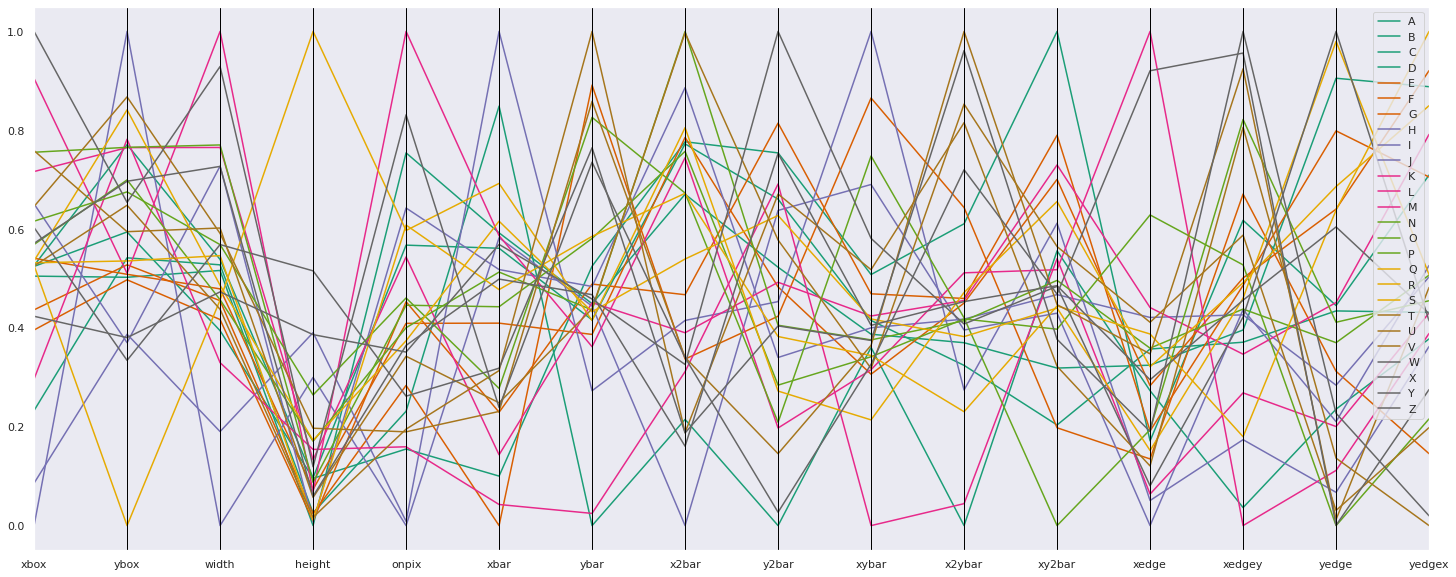

In [ ]:
import pandas
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(25,10))
parallel_coordinates(df1_mean, class_column='index',
                     colormap='Dark2',
                     cols=['xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar','x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge', 'yedgex'])

Remarks: Mean of the all measuring parameters are well distributed for each target classes.

In [ ]:
df2=df1.copy()
df2.head(3)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9


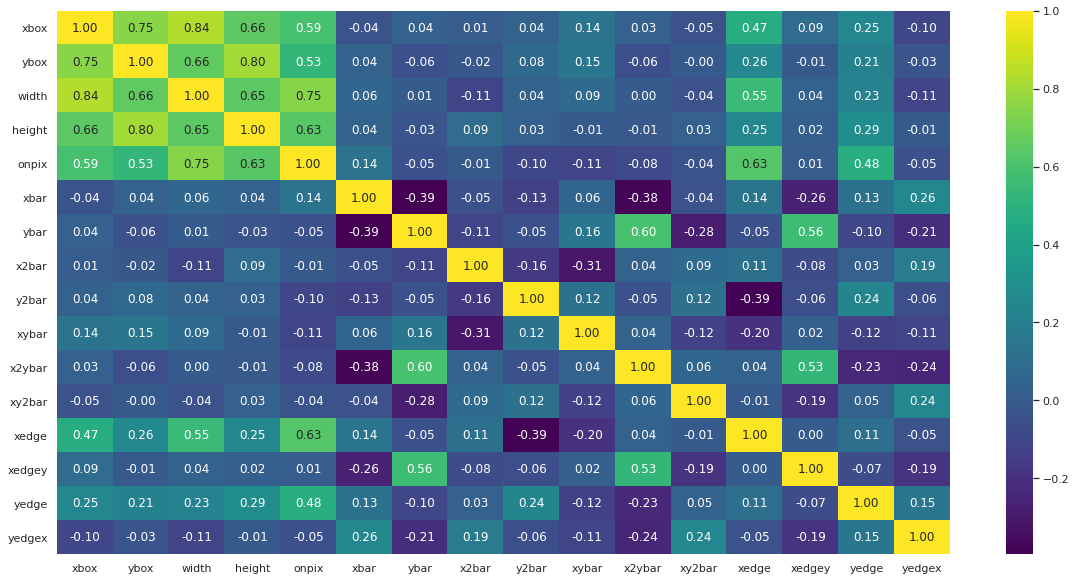

In [ ]:
corr_mat = df2.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat, annot=True, cmap='viridis',fmt='.2f')

Remarks: Some parameters are having strong correlation; feature selection to be performed.

In [ ]:
from sklearn.preprocessing import StandardScaler
# Saving all feature names to a list in a variable
dataColumns = df2.columns.to_list()

# Removing Class feature as it is our target
dataColumns.remove('letter')

encoder = StandardScaler()

for i in dataColumns:
   df2[i] = encoder.fit_transform(df2[[i]])

print('Success!')

Success!


In [ ]:
df2.head(3)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,-1.144417,0.237070,-1.178294,-0.232716,-1.231474,0.531756,2.358246,-1.746100,0.344235,-0.953149,1.351557,0.035798,-1.347535,-0.223412,-1.494712,0.130096
1,I,0.451855,1.491943,-1.178294,0.685459,-0.768617,1.515924,-1.090370,0.158195,-0.517819,1.882192,-1.315513,0.510429,-0.486890,-0.223412,0.079965,1.336868
2,D,-0.080235,1.178224,0.372167,1.144546,1.082808,1.515924,-0.659293,-0.984382,0.344235,0.667046,-1.315513,-0.438833,-0.056568,-0.858409,-0.313704,0.733482


In [ ]:
X = df2.drop('letter', axis = 1)
y = df2['letter']

#### 3.3 Feature Selection                                          

In [ ]:
!pip install yellowbrick 

In [ ]:
!pip install -U yellowbrick

     |████████████████████████████████| 276kB 9.1MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from random import randint                                          # Importing to generate random integers
from sklearn.preprocessing import StandardScaler                    # Importing standard scaler to perform standardization
from sklearn.feature_selection import SelectFromModel               # To select features from model using Yellow bricks
from yellowbrick.model_selection import FeatureImportances          # To select important features out of the model

In [ ]:
# Have some patience, may take some time :)
selector = SelectFromModel(RandomForestClassifier(n_estimators = 400, random_state = 42, n_jobs = -1))
selector.fit(X, y)

# Extracting list of important features
selected_feat = X.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Features:', selected_feat)

Total Features Selected are 9
Threshold set by Model: 0.06
Features: ['ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge']


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


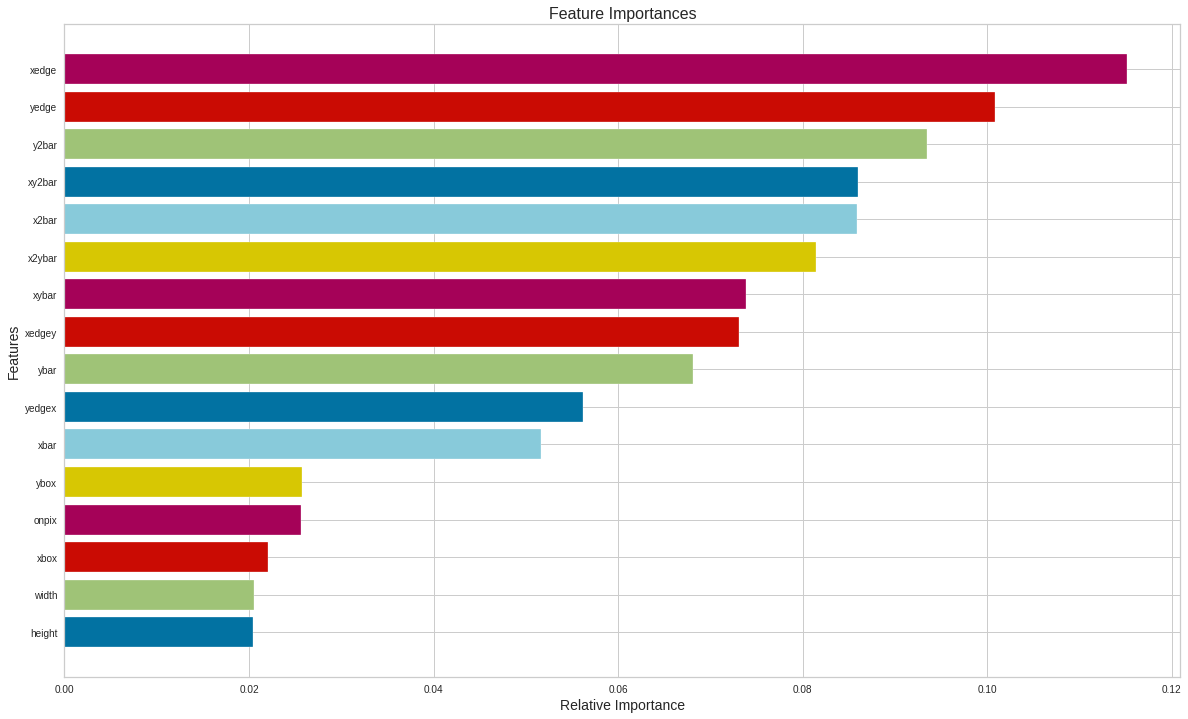

In [ ]:
figure = plt.figure(figsize = [20, 12])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(X, y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

Remarks: Nine (9) parameters have been choosen for final modeling.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'Variance Ratio')

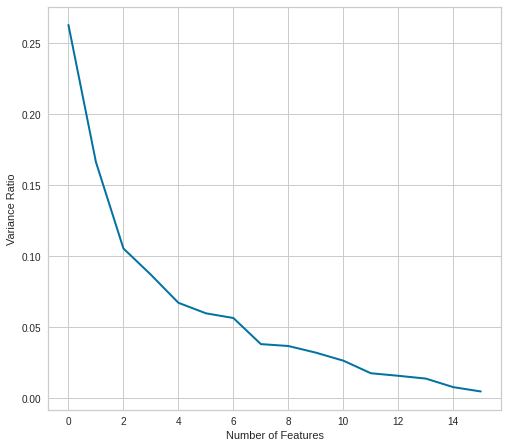

In [ ]:
plt.figure(1, figsize=(9, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Features')
plt.ylabel('Variance Ratio')

Remarks: Nine (9) parameters have been choosen for final modeling.

In [ ]:
!pip install -U dtale

In [ ]:
import dtale
import pandas as pd
import dtale.app as dtale_app

dtale_app.USE_COLAB = True

In [ ]:
df = df1.copy()

In [ ]:
df.head(3)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9


In [ ]:
dtale.show(df, ignore_duplicate=True)

https://n1l6asjt5l-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1

In [ ]:
from sklearn.preprocessing import StandardScaler
# Saving all feature names to a list in a variable
dataColumns = df.columns.to_list()

# Removing Class feature as it is our target
dataColumns.remove('letter')

encoder = StandardScaler()

for i in dataColumns:
   df[i] = encoder.fit_transform(df[[i]])

print('Success!')

Success!


In [ ]:
df.head(3)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,-1.144417,0.237070,-1.178294,-0.232716,-1.231474,0.531756,2.358246,-1.746100,0.344235,-0.953149,1.351557,0.035798,-1.347535,-0.223412,-1.494712,0.130096
1,I,0.451855,1.491943,-1.178294,0.685459,-0.768617,1.515924,-1.090370,0.158195,-0.517819,1.882192,-1.315513,0.510429,-0.486890,-0.223412,0.079965,1.336868
2,D,-0.080235,1.178224,0.372167,1.144546,1.082808,1.515924,-0.659293,-0.984382,0.344235,0.667046,-1.315513,-0.438833,-0.056568,-0.858409,-0.313704,0.733482


In [ ]:
columns = ['ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge']
col=[]
for c in columns:
    if c != 'letter':
      col.append(c)
target ='letter'
X=df[col]
y=df[target]
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (18668, 9)
Shape of y: (18668,)


### 4. Train-Test Split

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(order)
Y = lb.transform(y)
n_classes = Y.shape[1]

In [ ]:
n_classes

26

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1, stratify = y)

In [ ]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (14934, 9)
y_train shape:  (14934, 26)

Test cases as below
X_test shape:  (3734, 9)
y_test shape:  (3734, 26)


### 5. OneVsRestClassification: SVC - RBF

#### 5.1 Build Model                                          

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm

In [ ]:
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf',random_state=42))
classifier.fit(X_train, y_train)
y_score_svc = classifier.decision_function(X_test)

#### 5.2 Model Evaluation                                          

In [ ]:
from sklearn.metrics import precision_recall_curve , roc_curve
from sklearn.metrics import average_precision_score, recall_score
from sklearn.metrics import auc

# For each class
precision_svc = dict()
recall_svc = dict()
areauc_svc = dict()
avg_recall_svc = dict()
average_precision_svc = dict()
for i in range(n_classes):
    precision_svc[i], recall_svc[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score_svc[:, i])
    areauc_svc[i] = auc(recall_svc[i], precision_svc[i])
    average_precision_svc[i] = average_precision_score(y_test[:, i], y_score_svc[:, i])

In [ ]:
precision_svc["micro"], recall_svc["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score_svc.ravel())
average_precision_svc["micro"] = average_precision_score(y_test, y_score_svc, average="micro")
print('Average precision score : SVC, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_svc["micro"]))

Average precision score : SVC, micro-averaged over all classes: 0.94


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes : SVC RBF: AP=0.94')

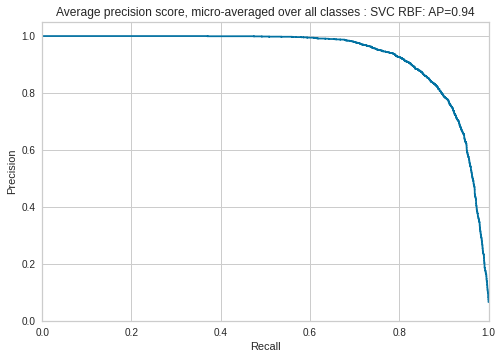

In [ ]:
plt.figure()
plt.step(recall_svc["micro"], precision_svc["micro"], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes : SVC RBF: AP={0:0.2f}'
    .format(average_precision_svc["micro"]))


Remarks: Model performance seems good.

In [ ]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

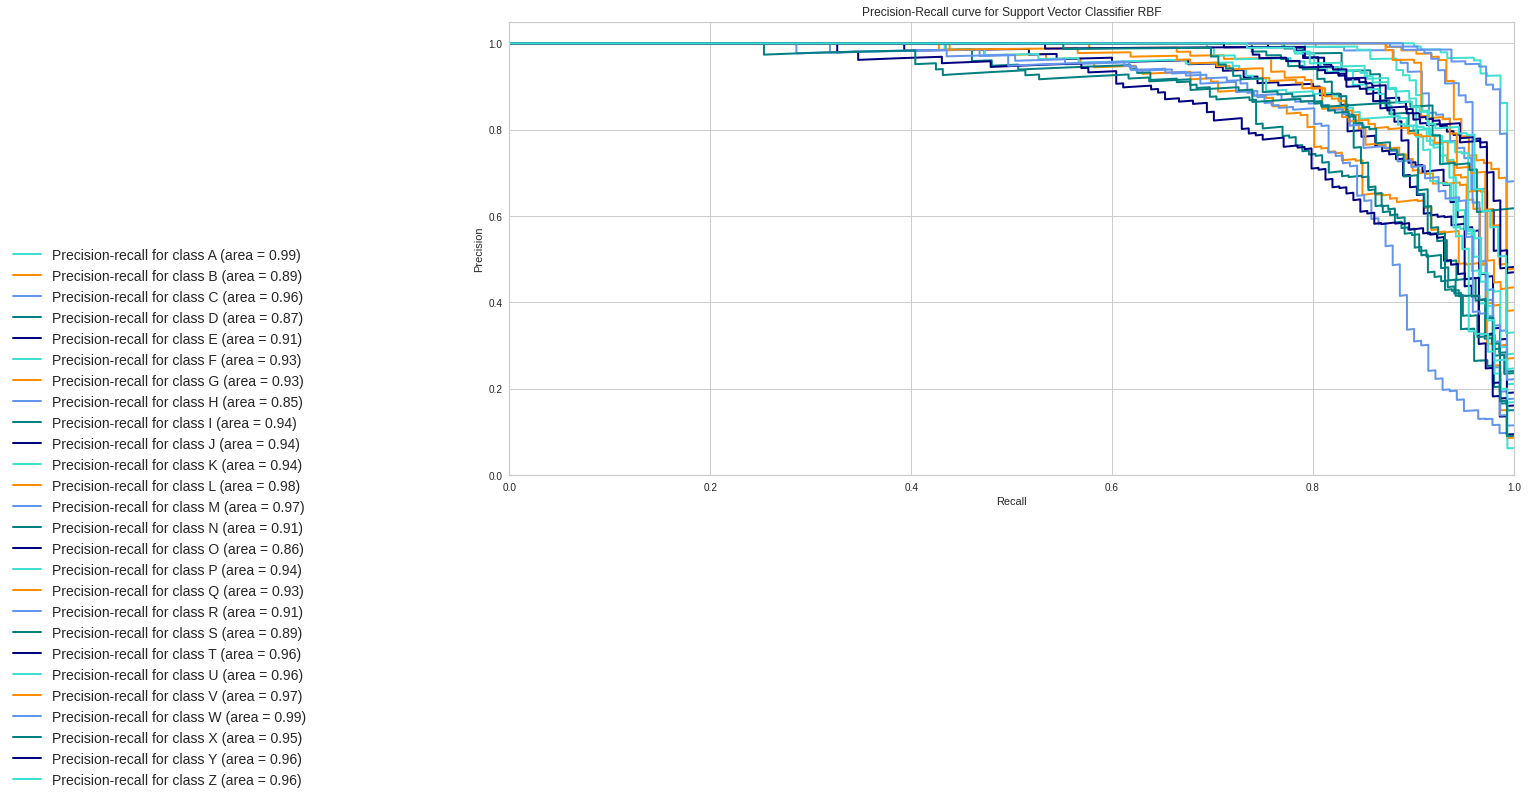

In [ ]:
plt.figure(figsize=(18, 10))
lines = []
labels = []
for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall_svc[i], precision_svc[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(order[i], areauc_svc[i]))
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for Support Vector Classifier RBF')
plt.legend(lines, labels, loc=(-0.5, -0.7), prop=dict(size=14))
fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)

plt.show()

Remarks: PR AUC figures are satisfactory.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_svc = dict()
tpr_svc = dict()
rocauc_svc = dict()
for i in range(n_classes):
    fpr_svc[i], tpr_svc[i], _ = roc_curve(y_test[:, i],
                                  y_score_svc[:, i])
    rocauc_svc[i] = roc_auc_score(y_test[:, i], y_score_svc[:, i])


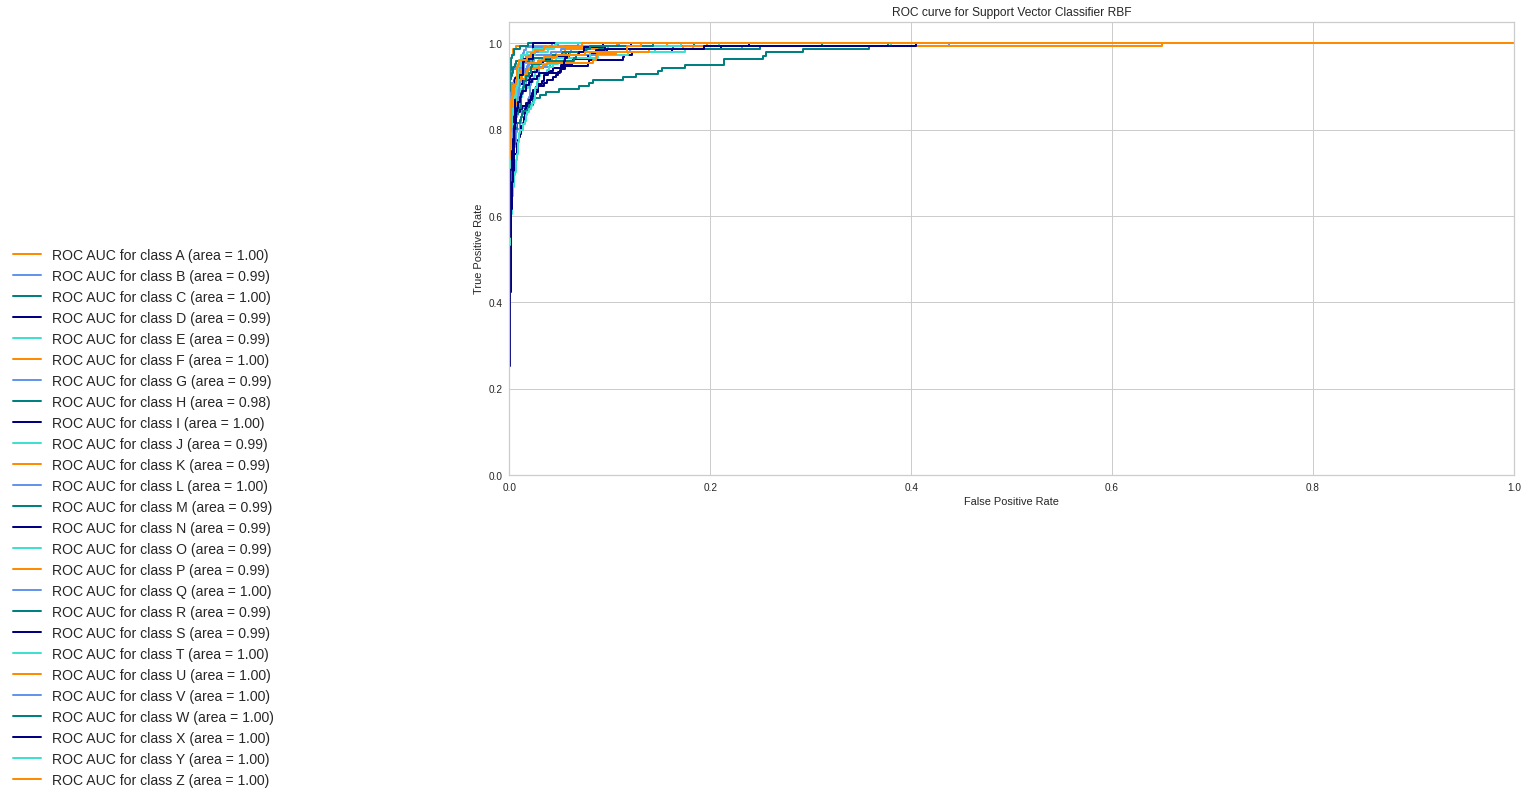

In [ ]:
plt.figure(figsize=(18, 10))
lines = []
labels = []
for i, color in zip(range(n_classes), colors):
    l, = plt.plot(fpr_svc[i], tpr_svc[i], color=color, lw=2)
    lines.append(l)
    labels.append('ROC AUC for class {0} (area = {1:0.2f})'
                  ''.format(order[i], rocauc_svc[i]))
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Support Vector Classifier RBF')
plt.legend(lines, labels, loc=(-0.5, -0.7), prop=dict(size=14))
fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)

plt.show()

Remarks: ROC AUC figures are satisfactory.

### 6. OneVsRestClassification: RFC

#### 6.1 Build Model                                          

In [ ]:
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=150,
                             max_depth=3,
                             random_state=0))
clf.fit(X_train, y_train)

y_score_rfc = clf.predict_proba(X_test)

#### 6.2 Model Evaluation                                          

In [ ]:
from sklearn.metrics import precision_recall_curve , roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc

# For each class
precision_rfc = dict()
recall_rfc = dict()
areauc_rfc = dict()
average_precision_rfc = dict()
for i in range(n_classes):
    precision_rfc[i], recall_rfc[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score_rfc[:, i])
    areauc_rfc[i] = auc(recall_rfc[i], precision_rfc[i])
    average_precision_rfc[i] = average_precision_score(y_test[:, i], y_score_rfc[:, i])

In [ ]:
precision_rfc["micro"], recall_rfc["micro"], _ = precision_recall_curve(y_test.ravel(),y_score_rfc.ravel())
average_precision_rfc["micro"] = average_precision_score(y_test, y_score_rfc,
                                                     average="micro")
print('Average precision score : RFC, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_rfc["micro"]))

Average precision score : RFC, micro-averaged over all classes: 0.68


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes : RFC : AP=0.68')

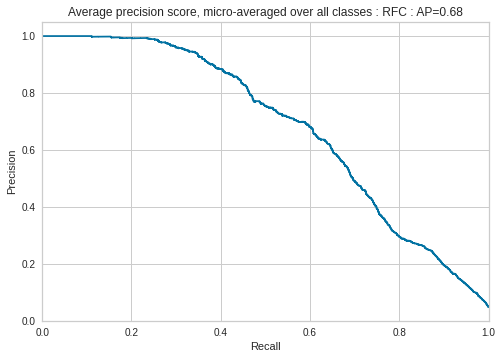

In [ ]:
plt.figure()
plt.step(recall_rfc["micro"], precision_rfc["micro"], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes : RFC : AP={0:0.2f}'
    .format(average_precision_rfc["micro"]))


In [ ]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

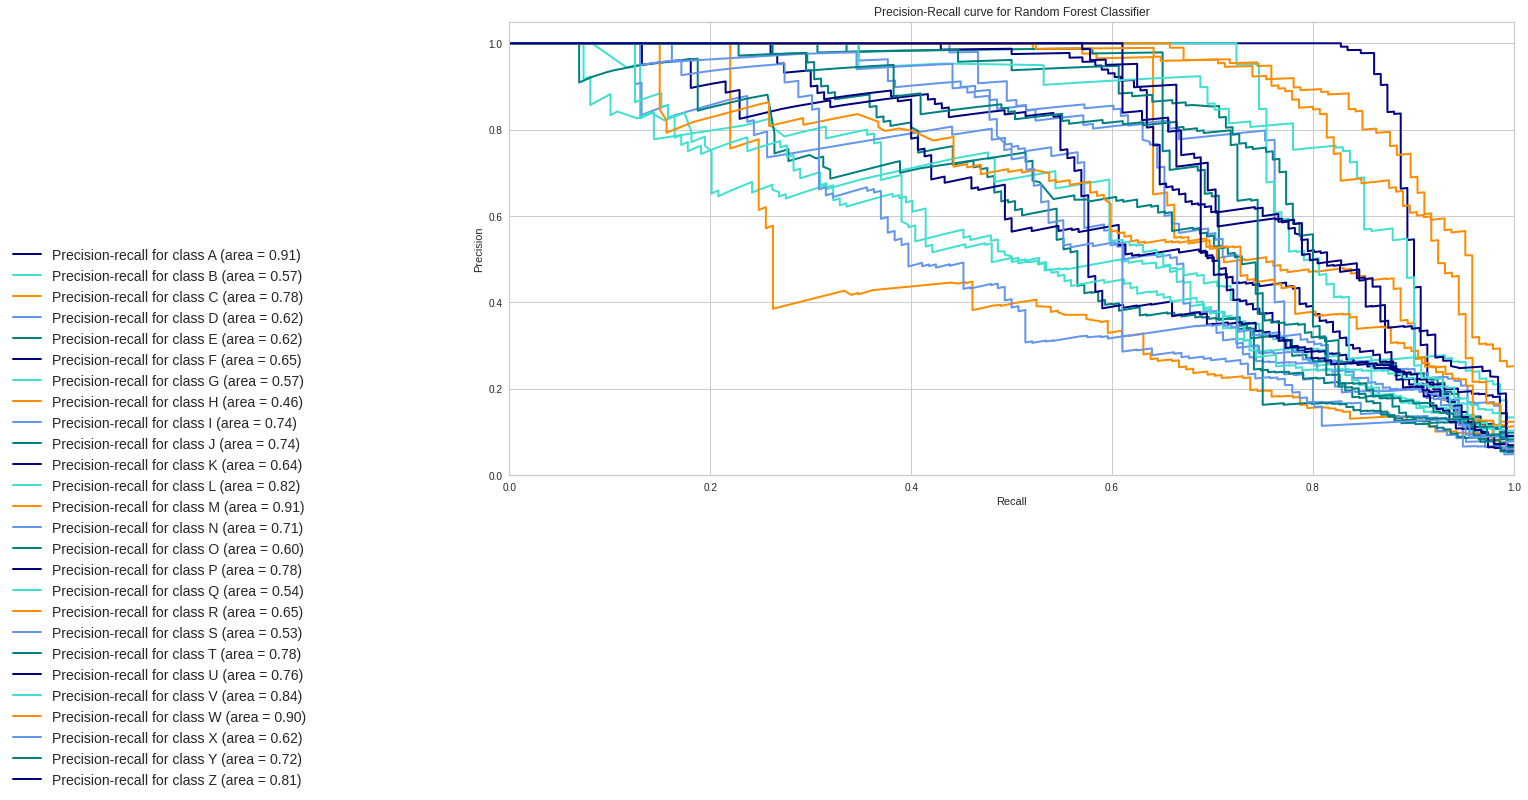

In [ ]:
plt.figure(figsize=(18, 10))
lines = []
labels = []
for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall_rfc[i], precision_rfc[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(order[i], areauc_rfc[i]))
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for Random Forest Classifier')
plt.legend(lines, labels, loc=(-0.5, -0.7), prop=dict(size=14))
fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)

plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_rfc = dict()
tpr_rfc = dict()
rocauc_rfc = dict()
for i in range(n_classes):
    fpr_rfc[i], tpr_rfc[i], _ = roc_curve(y_test[:, i],
                                  y_score_rfc[:, i])
    rocauc_rfc[i] = roc_auc_score(y_test[:, i], y_score_rfc[:, i])


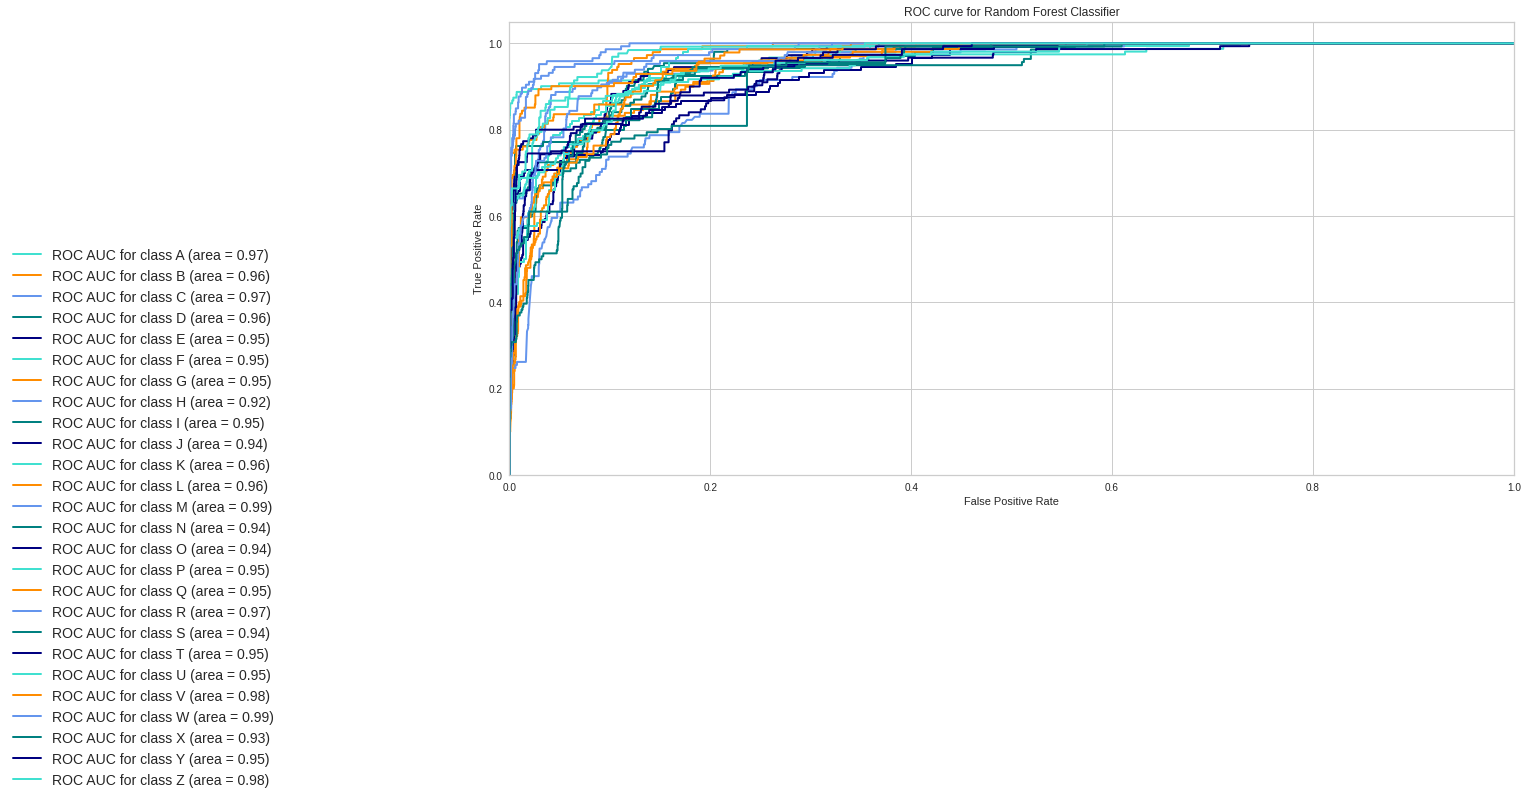

In [ ]:
plt.figure(figsize=(18, 10))
lines = []
labels = []
for i, color in zip(range(n_classes), colors):
    l, = plt.plot(fpr_rfc[i], tpr_rfc[i], color=color, lw=2)
    lines.append(l)
    labels.append('ROC AUC for class {0} (area = {1:0.2f})'
                  ''.format(order[i], rocauc_rfc[i]))
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest Classifier')
plt.legend(lines, labels, loc=(-0.5, -0.7), prop=dict(size=14))
fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)

plt.show()

### 7. OneVsRestClassification: LogReg

#### 7.1 Build Model                                          

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
# define model
model = LogisticRegression()
# define the ovr strategy
ovr_lr = OneVsRestClassifier(model)
# fit model
ovr_lr.fit(X_train, y_train)
# make predictions
y_pred_lr = ovr_lr.predict(X)
y_score_lr = ovr_lr.predict_proba(X_test)

#### 7.2 Model Evaluation                                          

In [ ]:
from sklearn.metrics import precision_recall_curve , roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc

# For each class
precision_lr = dict()
recall_lr = dict()
areauc_lr = dict()
average_precision_lr = dict()
for i in range(n_classes):
    precision_lr[i], recall_lr[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score_lr[:, i])
    areauc_lr[i] = auc(recall_lr[i], precision_lr[i])
    average_precision_lr[i] = average_precision_score(y_test[:, i], y_score_lr[:, i])

In [ ]:
precision_lr["micro"], recall_lr["micro"], _ = precision_recall_curve(y_test.ravel(),y_score_lr.ravel())
average_precision_lr["micro"] = average_precision_score(y_test, y_score_lr,
                                                     average="micro")
print('Average precision score : LR, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_lr["micro"]))

Average precision score : LR, micro-averaged over all classes: 0.54


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes : LR : AP=0.54')

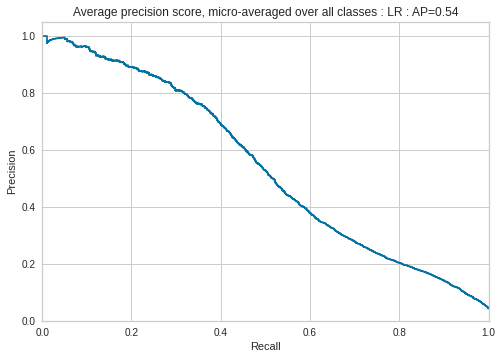

In [ ]:
plt.figure()
plt.step(recall_lr["micro"], precision_lr["micro"], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes : LR : AP={0:0.2f}'
    .format(average_precision_lr["micro"]))


### 8. OneVsRestClassification: Naive Byes

#### 8.1 Build Model                                          

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
# define model
model = GaussianNB()
# define the ovr strategy
ovr_gn = OneVsRestClassifier(model)
# fit model
ovr_gn.fit(X_train, y_train)
# make predictions
y_pred_gn = ovr_gn.predict(X)
y_score_gn = ovr_gn.predict_proba(X_test)

#### 8.2 Model Evaluation                                          

In [ ]:
from sklearn.metrics import precision_recall_curve , roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc

# For each class
precision_gn = dict()
recall_gn = dict()
areauc_gn = dict()
average_precision_gn = dict()
for i in range(n_classes):
    precision_gn[i], recall_gn[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score_gn[:, i])
    areauc_gn[i] = auc(recall_gn[i], precision_gn[i])
    average_precision_gn[i] = average_precision_score(y_test[:, i], y_score_gn[:, i])

In [ ]:
precision_gn["micro"], recall_gn["micro"], _ = precision_recall_curve(y_test.ravel(),y_score_gn.ravel())
average_precision_gn["micro"] = average_precision_score(y_test, y_score_gn,
                                                     average="micro")
print('Average precision score : Naive, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_gn["micro"]))

Average precision score : Naive, micro-averaged over all classes: 0.58


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes : Naive : AP=0.58')

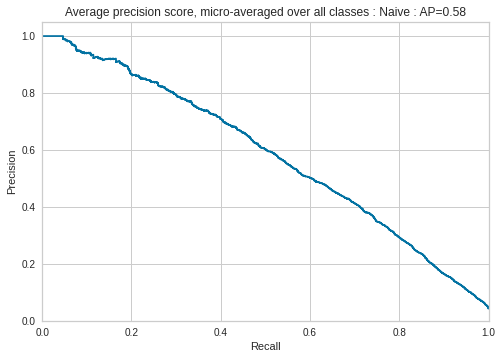

In [ ]:
plt.figure()
plt.step(recall_gn["micro"], precision_gn["micro"], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes : Naive : AP={0:0.2f}'
    .format(average_precision_gn["micro"]))


### 9. OneVsRestClassification: SVC-Linear

#### 9.1 Build Model                                          

In [ ]:
classifier_lnr = OneVsRestClassifier(svm.SVC(kernel='linear',random_state=42))
classifier_lnr.fit(X_train, y_train)
y_score_lnr = classifier_lnr.decision_function(X_test)

#### 9.2 Model Evaluation                                          

In [ ]:
from sklearn.metrics import precision_recall_curve , roc_curve
from sklearn.metrics import average_precision_score, recall_score
from sklearn.metrics import auc

# For each class
precision_lnr = dict()
recall_lnr = dict()
areauc_lnr = dict()
avg_recall_lnr = dict()
average_precision_lnr = dict()
for i in range(n_classes):
    precision_lnr[i], recall_lnr[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score_lnr[:, i])
    areauc_lnr[i] = auc(recall_lnr[i], precision_lnr[i])
    average_precision_lnr[i] = average_precision_score(y_test[:, i], y_score_lnr[:, i])

In [ ]:
precision_lnr["micro"], recall_lnr["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score_lnr.ravel())
average_precision_lnr["micro"] = average_precision_score(y_test, y_score_lnr, average="micro")
print('Average precision score : SVC LNR, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_lnr["micro"]))

Average precision score : SVC LNR, micro-averaged over all classes: 0.47


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes : SVC LNR : AP=0.47')

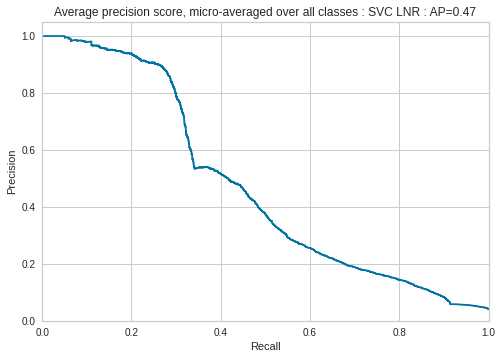

In [ ]:
plt.figure()
plt.step(recall_lnr["micro"], precision_lnr["micro"], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes : SVC LNR : AP={0:0.2f}'
    .format(average_precision_lnr["micro"]))


In [ ]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

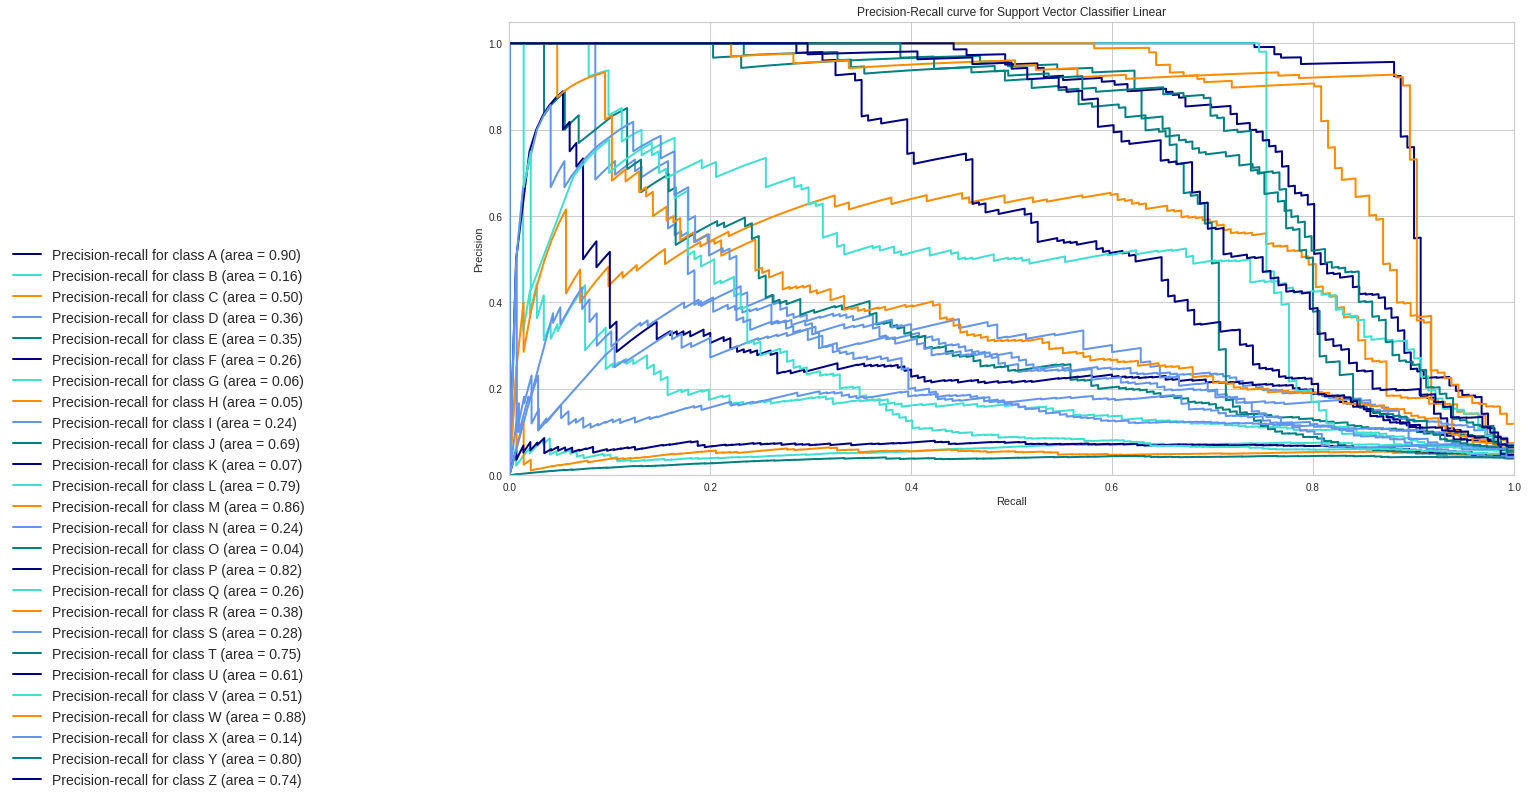

In [ ]:
plt.figure(figsize=(18, 10))
lines = []
labels = []
for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall_lnr[i], precision_lnr[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(order[i], areauc_lnr[i]))
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for Support Vector Classifier Linear')
plt.legend(lines, labels, loc=(-0.5, -0.7), prop=dict(size=14))
fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)

plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_lnr = dict()
tpr_lnr = dict()
rocauc_lnr = dict()
for i in range(n_classes):
    fpr_lnr[i], tpr_lnr[i], _ = roc_curve(y_test[:, i],
                                  y_score_lnr[:, i])
    rocauc_lnr[i] = roc_auc_score(y_test[:, i], y_score_lnr[:, i])


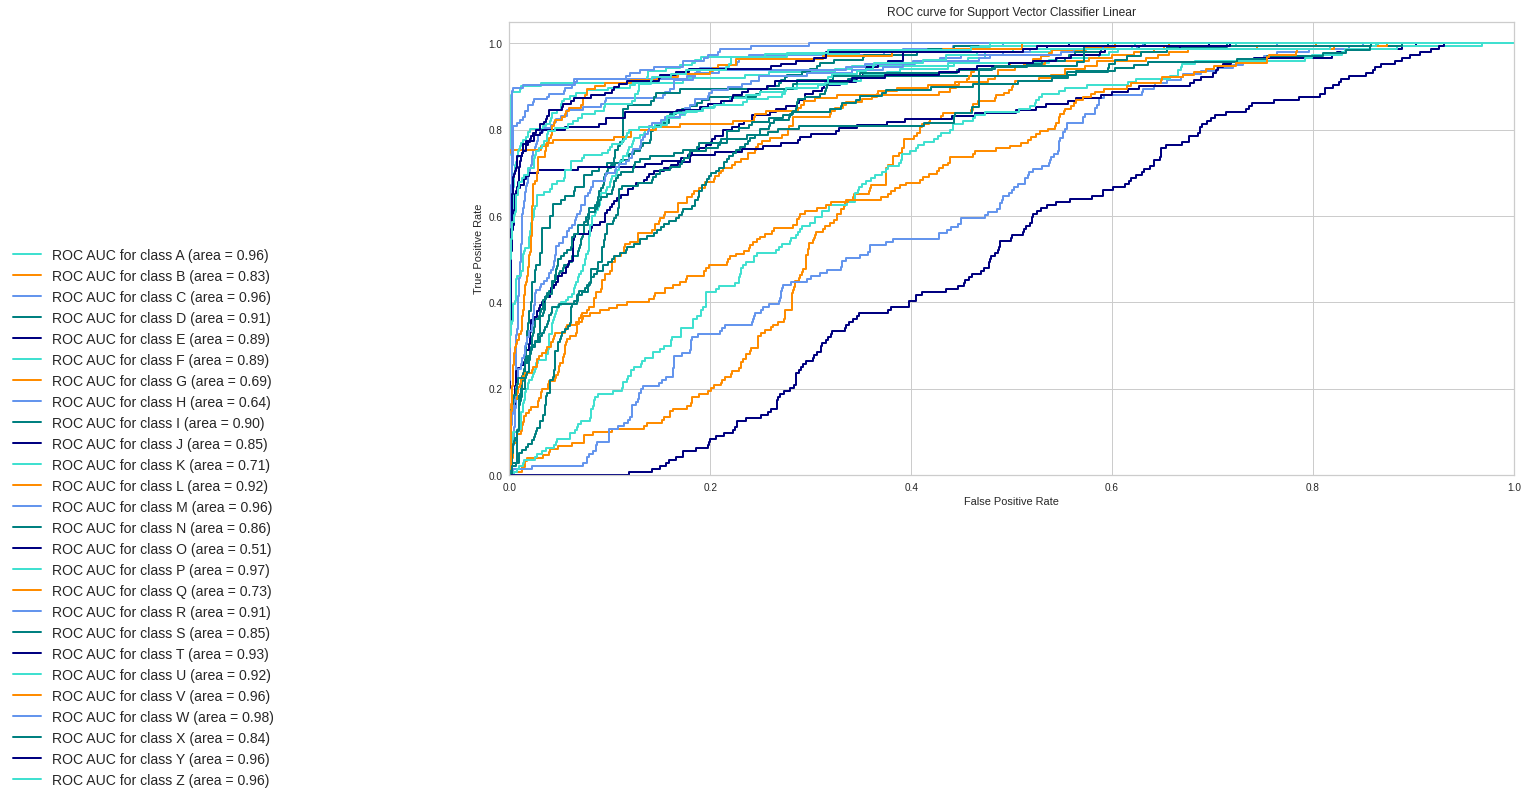

In [ ]:
plt.figure(figsize=(18, 10))
lines = []
labels = []
for i, color in zip(range(n_classes), colors):
    l, = plt.plot(fpr_lnr[i], tpr_lnr[i], color=color, lw=2)
    lines.append(l)
    labels.append('ROC AUC for class {0} (area = {1:0.2f})'
                  ''.format(order[i], rocauc_lnr[i]))
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Support Vector Classifier Linear')
plt.legend(lines, labels, loc=(-0.5, -0.7), prop=dict(size=14))
fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)

plt.show()

### 10. Model Evaluation

#### 10.1 Precision-Recall Curve among models    

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes')

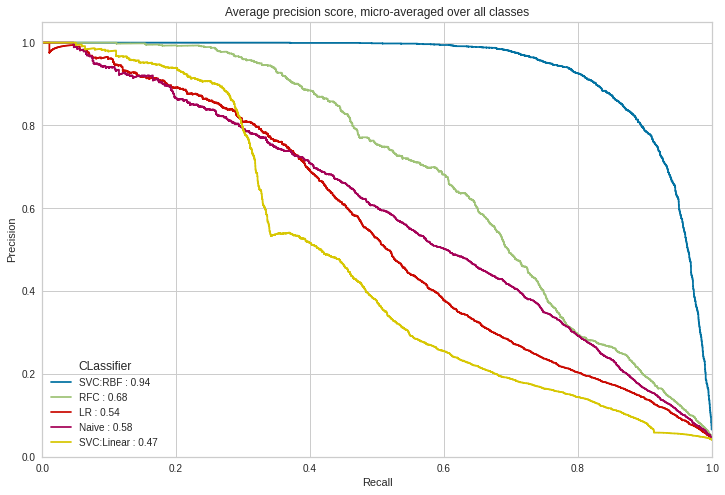

In [ ]:
plt.figure(figsize=(12,8))
plt.step(recall_svc["micro"], precision_svc["micro"], where='post', label ='SVC:RBF : {0:0.2f}'.format(average_precision_svc["micro"]))
plt.step(recall_rfc["micro"], precision_rfc["micro"], where='post', label = 'RFC : {0:0.2f}'.format(average_precision_rfc["micro"]))
plt.step(recall_lr["micro"], precision_lr["micro"], where='post', label = 'LR : {0:0.2f}'.format(average_precision_lr["micro"]))
plt.step(recall_gn["micro"], precision_gn["micro"], where='post', label = 'Naive : {0:0.2f}'.format(average_precision_gn["micro"]))
plt.step(recall_lnr["micro"], precision_lnr["micro"], where='post', label = 'SVC:Linear : {0:0.2f}'.format(average_precision_lnr["micro"]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(title='CLassifier')
plt.title('Average precision score, micro-averaged over all classes')


Remarks: SVC (RBF) outperforms other models.

#### 10.2 Confusion Matrix and Classification Report                                          

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_svc = classifier.predict(X_test)
cm_svc = confusion_matrix(y_test.argmax(axis=1),y_pred_svc.argmax(axis=1))

In [ ]:
import seaborn as sns

In [ ]:
np.arange(26)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

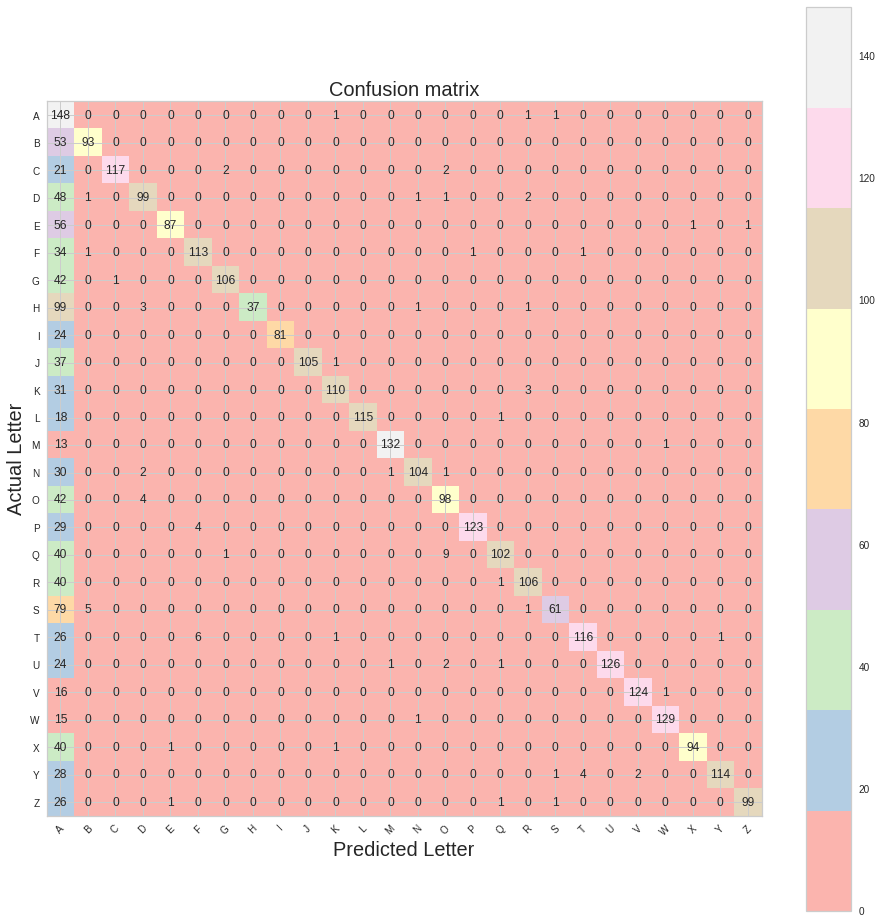

In [ ]:
plt.figure(figsize=(13,13))
plt.imshow(cm_svc, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 20)
plt.colorbar()
tick_marks = np.arange(26)
plt.xticks(tick_marks, [ "A",  "B",  "C",  "D",  "E",  "F",  "G",  "H",  "I",  "J", "K", "L", "M", "N", "O", 
                        "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"], rotation=45, size = 10)
plt.yticks(tick_marks, [ "A",  "B",  "C",  "D",  "E",  "F",  "G",  "H",  "I",  "J", "K", "L", "M", "N", "O", 
                        "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"], size = 10)
plt.tight_layout()
plt.ylabel('Actual Letter', size = 20)
plt.xlabel('Predicted Letter', size = 20)
width, height = cm_svc.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm_svc[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')

Remarks: Except Class "0" or "A" other's are having high precision.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1),y_pred_svc.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.14      0.98      0.24       151
           1       0.93      0.64      0.76       146
           2       0.99      0.82      0.90       142
           3       0.92      0.65      0.76       152
           4       0.98      0.60      0.74       145
           5       0.92      0.75      0.83       150
           6       0.97      0.71      0.82       149
           7       1.00      0.26      0.42       141
           8       1.00      0.77      0.87       105
           9       1.00      0.73      0.85       143
          10       0.96      0.76      0.85       144
          11       1.00      0.86      0.92       134
          12       0.99      0.90      0.94       146
          13       0.97      0.75      0.85       138
          14       0.87      0.68      0.76       144
          15       0.99      0.79      0.88       156
          16       0.96      0.67      0.79       152
          17       0.93    

In [ ]:
from sklearn.metrics import classification_report
y_pred_lnr = classifier_lnr.predict(X_test)
print(classification_report(y_test.argmax(axis=1),y_pred_lnr.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.05      0.99      0.10       151
           1       0.00      0.00      0.00       146
           2       0.64      0.56      0.60       142
           3       0.00      0.00      0.00       152
           4       0.00      0.00      0.00       145
           5       0.00      0.00      0.00       150
           6       0.00      0.00      0.00       149
           7       0.00      0.00      0.00       141
           8       0.00      0.00      0.00       105
           9       0.98      0.56      0.71       143
          10       0.00      0.00      0.00       144
          11       1.00      0.71      0.83       134
          12       0.87      0.76      0.81       146
          13       0.00      0.00      0.00       138
          14       0.00      0.00      0.00       144
          15       0.89      0.66      0.76       156
          16       0.00      0.00      0.00       152
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.metrics import classification_report
y_pred_rfc = clf.predict(X_test)
print(classification_report(y_test.argmax(axis=1),y_pred_rfc.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.05      1.00      0.10       151
           1       0.00      0.00      0.00       146
           2       1.00      0.48      0.65       142
           3       0.00      0.00      0.00       152
           4       1.00      0.26      0.42       145
           5       0.00      0.00      0.00       150
           6       0.00      0.00      0.00       149
           7       1.00      0.11      0.20       141
           8       1.00      0.44      0.61       105
           9       1.00      0.56      0.72       143
          10       0.00      0.00      0.00       144
          11       1.00      0.65      0.79       134
          12       1.00      0.55      0.71       146
          13       1.00      0.08      0.15       138
          14       0.00      0.00      0.00       144
          15       0.97      0.57      0.72       156
          16       0.00      0.00      0.00       152
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.metrics import classification_report
y_pred_lr = ovr_lr.predict(X_test)
print(classification_report(y_test.argmax(axis=1),y_pred_lr.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.06      0.98      0.11       151
           1       0.50      0.05      0.09       146
           2       0.59      0.47      0.52       142
           3       0.55      0.18      0.28       152
           4       0.22      0.01      0.03       145
           5       0.54      0.13      0.21       150
           6       0.00      0.00      0.00       149
           7       1.00      0.01      0.03       141
           8       0.93      0.26      0.40       105
           9       0.99      0.52      0.68       143
          10       0.00      0.00      0.00       144
          11       0.99      0.60      0.74       134
          12       0.83      0.72      0.77       146
          13       0.58      0.13      0.21       138
          14       0.00      0.00      0.00       144
          15       0.90      0.60      0.72       156
          16       0.80      0.05      0.10       152
          17       0.64    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.metrics import classification_report
y_pred_gn = ovr_gn.predict(X_test)
print(classification_report(y_test.argmax(axis=1),y_pred_gn.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.14      0.98      0.25       151
           1       0.42      0.66      0.51       146
           2       0.53      0.71      0.61       142
           3       0.58      0.64      0.61       152
           4       0.20      0.23      0.22       145
           5       0.40      0.76      0.52       150
           6       0.41      0.46      0.43       149
           7       0.48      0.26      0.33       141
           8       0.45      0.63      0.52       105
           9       0.85      0.58      0.69       143
          10       0.85      0.12      0.21       144
          11       0.95      0.69      0.80       134
          12       0.65      0.77      0.71       146
          13       0.94      0.25      0.39       138
          14       0.58      0.40      0.47       144
          15       1.00      0.35      0.52       156
          16       0.72      0.12      0.20       152
          17       0.73    

### 11. Cross Validation and Prediction with selected model

In [ ]:
classifier

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=42,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
cv_results_svc = cross_validate(classifier, X_train,y_train, cv=5, scoring='recall_weighted',verbose = 2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=  10.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s


[CV] ................................................. , total=  10.4s
[CV]  ................................................................
[CV] ................................................. , total=  10.5s
[CV]  ................................................................
[CV] ................................................. , total=  10.3s
[CV]  ................................................................
[CV] ................................................. , total=  10.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   52.0s finished


In [ ]:
cv_results_svc

{'fit_time': array([8.94682956, 8.92979836, 8.95190549, 8.78183627, 8.82230806]),
 'score_time': array([1.52570653, 1.50728726, 1.51000261, 1.49456668, 1.50217867]),
 'test_score': array([0.70405089, 0.710077  , 0.71744225, 0.70706394, 0.69524447])}

In [ ]:
cv_results_svc['test_score']

array([0.70405089, 0.710077  , 0.71744225, 0.70706394, 0.69524447])

In [ ]:
cv_results_svc['test_score'].mean()

0.7067757110461474

In [ ]:
cv_results_svc['test_score'].std()

0.007282179961741967

Remarks: Cross validation performance satisfactory.

In [ ]:
y_pred_test = classifier.predict(X_test)

In [ ]:
test_predictions = X_test.copy()

In [ ]:
test_predictions

,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge
1335,-0.228216,-0.222664,0.344235,-0.953149,-0.172483,-0.438833,0.373754,0.411585,2.441981
1218,-0.659293,1.681631,0.775262,-0.953149,-0.172483,-0.438833,-0.486890,-0.223412,2.048312
13373,-0.228216,0.158195,-0.086792,-0.548100,-0.172483,0.035798,3.816334,0.411585,0.867304
17767,-0.228216,0.919913,-0.086792,0.667046,-0.172483,0.985060,0.804077,-0.223412,0.079965
10693,-1.090370,0.539054,-1.379873,-0.548100,-0.172483,0.035798,3.386012,1.046582,1.654643
...,...,...,...,...,...,...,...,...,...
6631,-1.952524,-1.746100,1.206289,0.667046,-1.315513,1.459691,-1.347535,-0.858409,-0.707373
17556,-0.659293,0.539054,-0.086792,-0.548100,-0.553493,0.035798,1.234399,0.411585,1.654643
5443,-0.228216,-0.222664,3.361425,0.667046,-0.172483,0.035798,-1.347535,-0.223412,1.654643
11069,-1.090370,-0.603523,-1.810900,-1.358198,-2.077534,-0.438833,-0.056568,-0.858409,-0.707373


In [ ]:
# Saving all feature names to a list in a variable
dataColumns = test_predictions.columns.to_list()

for i in dataColumns:
   test_predictions[i] = encoder.inverse_transform(test_predictions[[i]])

print('Success!')

Success!


In [ ]:
y_pred_test=lb.inverse_transform(y_pred_test)

In [ ]:
y_test=lb.inverse_transform(y_test)

In [ ]:
test_predictions['actual'] = y_test
test_predictions['predicted'] = y_pred_test
test_predictions

,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,actual,predicted
1335,7.406165,7.415366,8.354896,6.204724,7.498532,7.057107,8.403819,8.466515,11.831519,J,A
1218,6.691736,10.571380,9.069243,6.204724,7.498532,7.057107,6.977460,7.414126,11.179085,B,B
13373,7.406165,8.046569,7.640549,6.876016,7.498532,7.843719,14.109253,8.466515,9.221785,M,M
17767,7.406165,9.308974,7.640549,8.889895,7.498532,9.416943,9.116998,7.414126,7.916918,O,O
10693,5.977306,8.677772,5.497508,6.876016,7.498532,7.843719,13.396074,9.518904,10.526652,O,A
...,...,...,...,...,...,...,...,...,...,...,...
6631,4.548447,4.890555,9.783590,8.889895,5.604172,10.203556,5.551102,6.361737,6.612051,L,L
17556,6.691736,8.677772,7.640549,6.876016,6.867079,7.843719,9.830177,8.466515,10.526652,M,A
5443,7.406165,7.415366,13.355325,8.889895,7.498532,7.843719,5.551102,7.414126,10.526652,Z,Z
11069,5.977306,6.784163,4.783161,5.533431,4.341266,7.057107,7.690639,6.361737,6.612051,A,A


In [ ]:
test_predictions.to_csv('test_predictions.csv')

In [ ]:
from google.colab import files
files.download("test_predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 12. Conclusion

- Model for Multiclass classification has been built.

- Support Vector Classification (with RBF kernel) out-performed other models in this case study of Letter recognition from their parameters.

- “Recall” achieved maximum 0.73 and it is expected that this can further be improved with Neural network based models.

- This case study can also be referred and used for similar type multiclass classification problem.
